In [1]:
%pylab inline
%ls

Populating the interactive namespace from numpy and matplotlib
1.CSV                 Unknown.png           data.data             simulacion2.jpg       table2.dat
ChuaSimulation.ipynb  Untitled.ipynb        js.ipynb              table1.dat            trabajo2.ipynb


In [68]:
import numpy as np
import matplotlib.pyplot as plt
data = loadtxt("data.data", delimiter = ',')
data2=np.loadtxt('data.data',delimiter= ',')
data2[:+10,:]
print data



[[ 3.3   -1.901]
 [ 3.06  -1.797]
 [ 2.8   -1.682]
 [ 2.62  -1.601]
 [ 2.36  -1.489]
 [ 2.22  -1.425]
 [ 2.07  -1.361]
 [ 1.82  -1.25 ]
 [ 1.62  -1.161]
 [ 1.4   -1.07 ]
 [ 1.22  -0.989]
 [ 1.05  -0.912]
 [ 0.807 -0.744]
 [ 0.622 -0.583]
 [ 0.51  -0.497]
 [ 0.406 -0.413]
 [ 0.205 -0.243]
 [ 0.897 -0.814]
 [ 0.72  -0.663]
 [ 0.283 -0.309]
 [-3.34   1.895]
 [-3.09   1.785]
 [-2.78   1.65 ]
 [-2.64   1.585]
 [-2.38   1.476]
 [-2.24   1.413]
 [-1.98   1.3  ]
 [-1.83   1.234]
 [-1.59   1.131]
 [-1.38   1.04 ]
 [-1.25   0.959]
 [-1.05   0.787]
 [-0.895  0.667]
 [-0.803  0.587]
 [-0.705  0.502]
 [-0.488  0.331]
 [-0.62   0.434]
 [-0.4    0.258]
 [-0.293  0.171]
 [-0.21   0.097]]


In [69]:
def mas(a):
    for i in range(len(a)):
        a[i]=a[i]+10

    
a = data.T[1]

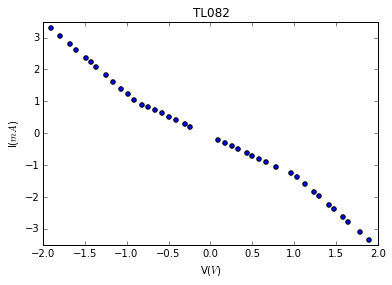

In [87]:

    
a = data.T[1]


v = data.T[0]
arr = array([a,v])
arr=arr
arr = arr.T[arr[0].argsort()].T
arr=arr.T[0]

plt.figure()
plt.scatter(a,v)

plt.xlabel('V($V$)')
plt.ylabel('I($mA$)')
plt.title('TL082')
plt.xlim(-2,2)
plt.ylim(-3.5,3.5)

plt.savefig('Diodo de chua.png')


IndexError: index 1 is out of bounds for axis 0 with size 0

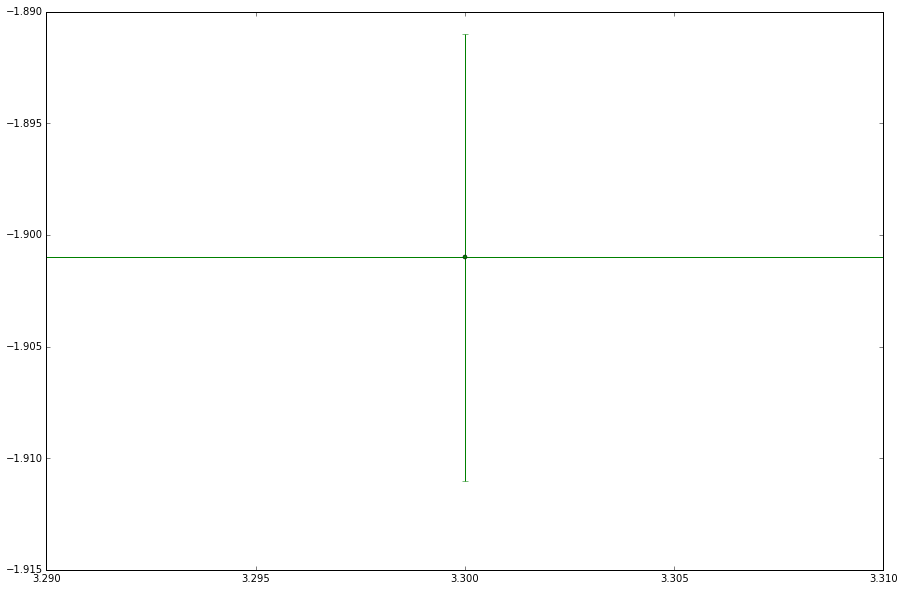

In [73]:

a1 = arr.T[:12]
b1 = arr.T[12:29]
a3 = arr.T[29:]
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)
ax.errorbar(a1.T[1],a1.T[0], fmt = "o",xerr  = 0.010, yerr = 0.01 , markersize = 4 , c= 'g')
ax.errorbar(b1.T[1],b1.T[0], fmt = "o",xerr  = 0.010, yerr = 0.01 , markersize = 4 , c = 'r')
ax.errorbar(a3.T[1],a3.T[0], fmt = "o",xerr  = 0.010, yerr = 0.01 , markersize = 4 , c = 'g')
x1 = np.linspace(-3.5,-1.2,100)
x2 = linspace(-1.2,1,100)
x3 = linspace(1,3.5,100)
ax.plot(x3,f(x3,slope,intercept))
ax.plot(x2,f(x2,slope1,intercept1))
ax.plot(x1,f(x1,slope3,intercept3))
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_ylabel(r"$I(mA)$", fontsize = 30)
ax.set_xlabel(r"$V(V)$", fontsize = 30)
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
        
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.set_title(r"$Ajuste\ de\ la\ curva\ de\ caracter\'istica\ UA741$", fontsize = 30)
fig.savefig('fit.jpg')

from scipy import optimize
def f(x, c, b):
    return c*x +b

In [52]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(a1.T[1],a1.T[0])
slope1, intercept1, r_value1, p_value, std_err = stats.linregress(b1.T[1],b1.T[0])
slope3, intercept3, r_value1, p_value, std_err = stats.linregress(a3.T[1],a3.T[0])
print mean([slope,slope3]), intercept, sqrt(-r_value), slope
print slope1, intercept1, sqrt(-r_value1)
inter = (intercept1 -intercept)/(mean([slope])-slope1)
print inter
x1 = linspace(0,inter, 100)
x2 = linspace(inter,7, 100)

-0.439992931406 -0.451949363819 0.999993774561 -0.439099750751
-0.823972601579 -0.0745593069413 0.999894043334
0.980557750605


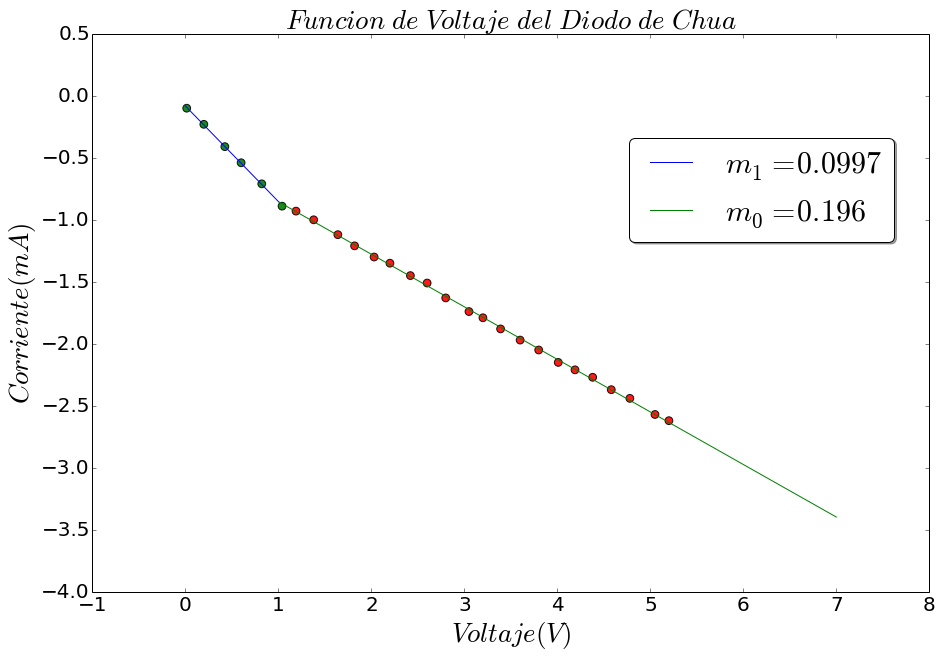

In [13]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)
ax.scatter(a1.T[0],a1.T[1], c= 'g', s = 60, alpha = 0.9)
ax.scatter(b1.T[0],b1.T[1], c = 'r', s = 60, alpha = 0.9)
ax.plot(x1,f(x1,slope,intercept), label = r"$m_1 = 0.0997$")
ax.plot(x2,f(x2,slope1,intercept1), label = r"$m_0 = 0.196$")
#ax.set_ylim(-1,0.2)
#ax.set_xlim(-6,1)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_ylabel(r"$Corriente(mA)$", fontsize = 27)
ax.set_xlabel(r"$Voltaje(V)$", fontsize = 27)
ax.set_title("$Funcion\ de\ Voltaje\ del\ Diodo\ de\ Chua$", fontsize = 27)
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
                # specify integer or one of preset strings, e.g.
                #tick.label.set_fontsize('x-small') 
lgd = ax.legend(loc='lower center',bbox_to_anchor=(0.80, 0.6),fancybox=True, shadow=True, fontsize = 30)
#fig.savefig('funcion.jpg')

C1 = 8 nF +-1
C2 = 103nf +-1
R = 2.18kohm +- 0.01
